# IBM z Datathon 2022
## Team 84 -> **Crestrix**
### Team Members
- Naveen G
- Rishika S V
- Moorthi D
- Krishna Prasad S
- Sai Sanjana S 
- Devi Shree S

# **Project Title:** Engaging DataVisualization solutions on STARTUPS

In [23]:
import os, re

print(os.listdir("."))

['.jupyter', 'Investments.png', 'DomainGroupLocation.png', '.cache', '.config', 'InvestedDomains.png', 'startup_funding.csv', 'Domains.png', 'Location.png', 'shared', 'DomainGroupLocation-all.png', '.ipython', 'StartUp.ipynb', 'SubDomain.png', '.keras', 'mnist_seqdnn', '.local', '.ipynb_checkpoints', 'customer_churn.onnx', 'Digit_Class_TensorFlow.ipynb', 'Churn_Scikit_PyTorch.ipynb', 'clients.csv', 'transactions.csv']


In [2]:
import numpy as np #used for scientific computation
import pandas as pd #used for data mugging and preprocessing
import matplotlib.pyplot as plt #data visualization library
from pandas import DataFrame as show # dataframe is the optimised structure used here to clean and analyse data
import seaborn as sns # stastical visualization library
%matplotlib inline

In [3]:
df=pd.read_csv('./startup_funding.csv',dtype={'InvestmentType':'category'})

In [4]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [5]:
df['CityLocation']=df['CityLocation'].fillna(value='NotSpecific')

In [6]:
import re#importing regular expressions
def convert_Slash(x):#converts citylocation where multiple citiescentres
    x=x.lower()#converting  whole data to lower case to avoid dublicate entries 
    if   re.search('/',x):
        return x.split('/')[0].strip()#converting multiple citycentres to single one 
    else :
        return x.strip()# removing extra spaces from left and right to reduce duplicate cities


In [7]:
df['CityLocation']=df['CityLocation'].apply(convert_Slash)

In [8]:
counts = df.apply(pd.value_counts)

In [9]:
df["CityLocation"]

0         bangalore
1            mumbai
2         new delhi
3            mumbai
4         hyderabad
           ...     
2367    notspecific
2368    notspecific
2369    notspecific
2370    notspecific
2371    notspecific
Name: CityLocation, Length: 2372, dtype: object

In [10]:
freq = {}
lst =  df["CityLocation"].to_list()
lst
for items in lst:
    freq[items] = lst.count(items)
freq =sorted(freq.items(), key=lambda kv: kv[1], reverse=True)

In [11]:
freq

[('bangalore', 635),
 ('mumbai', 449),
 ('new delhi', 385),
 ('gurgaon', 241),
 ('notspecific', 179),
 ('pune', 91),
 ('noida', 79),
 ('hyderabad', 77),
 ('chennai', 67),
 ('ahmedabad', 35),
 ('jaipur', 25),
 ('kolkata', 19),
 ('chandigarh', 10),
 ('vadodara', 9),
 ('indore', 9),
 ('goa', 8),
 ('singapore', 5),
 ('delhi', 4),
 ('kanpur', 4),
 ('coimbatore', 3),
 ('trivandrum', 2),
 ('gwalior', 2),
 ('udupi', 2),
 ('kochi', 2),
 ('agra', 2),
 ('us', 2),
 ('siliguri', 2),
 ('usa', 2),
 ('bhopal', 2),
 ('surat', 1),
 ('missourie', 1),
 ('panaji', 1),
 ('karur', 1),
 ('hubli', 1),
 ('kerala', 1),
 ('kozhikode', 1),
 ('lucknow', 1),
 ('sfo', 1),
 ('london', 1),
 ('seattle', 1),
 ('varanasi', 1),
 ('jodhpur', 1),
 ('boston', 1),
 ('belgaum', 1),
 ('new york', 1),
 ('nagpur', 1),
 ('india', 1),
 ('udaipur', 1),
 ('dallas', 1)]

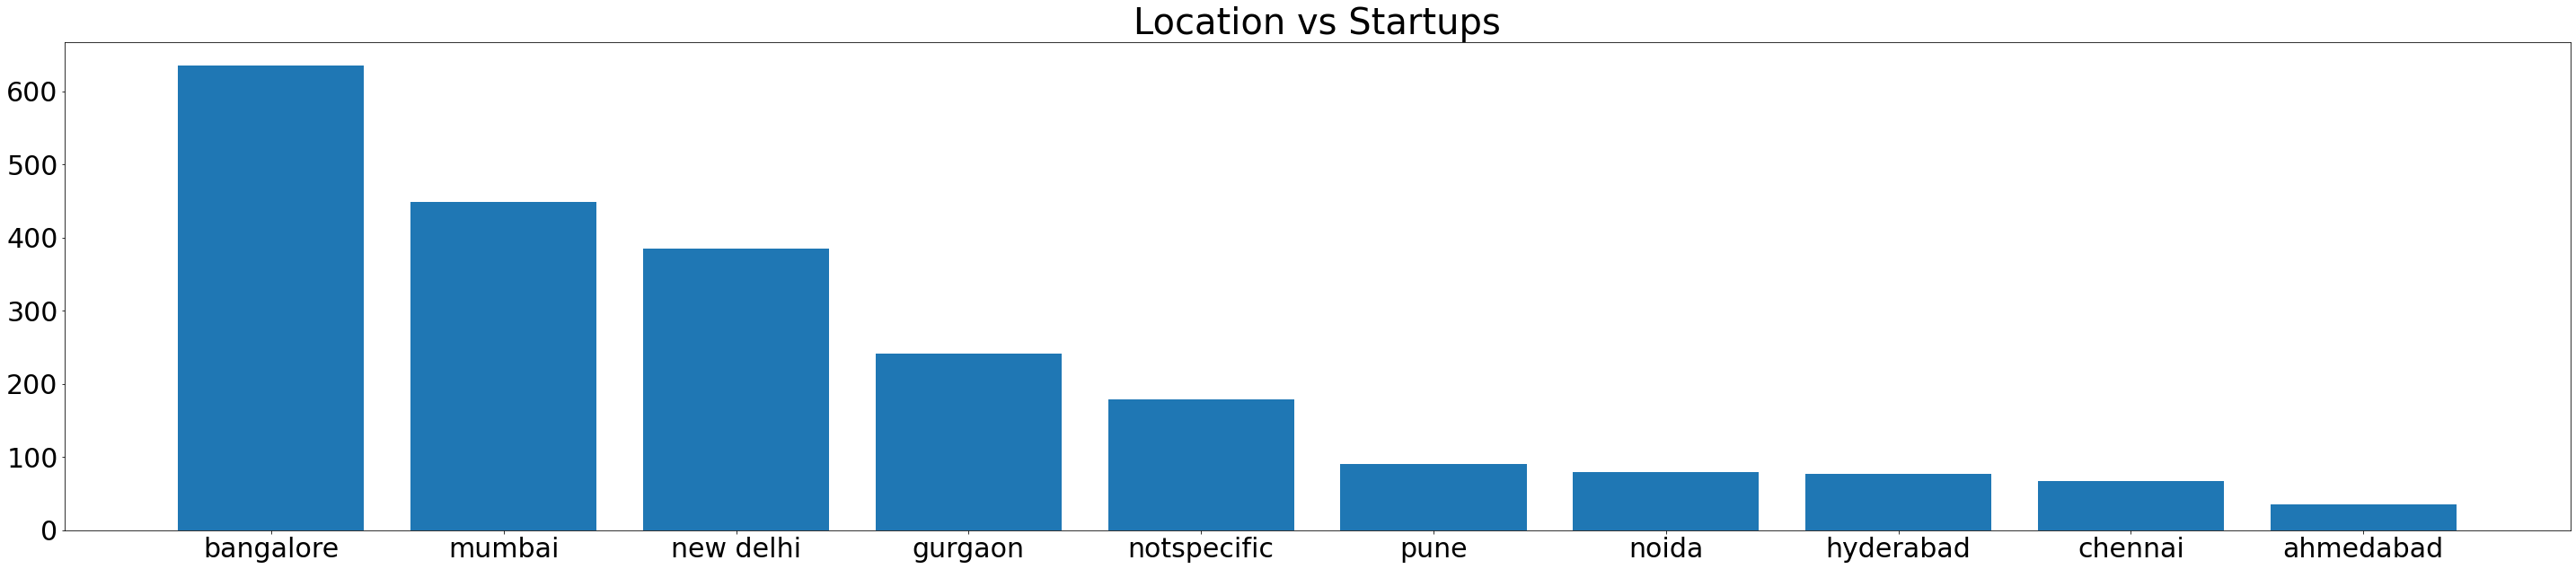

In [12]:
fig = plt.figure(figsize=(50,10))
plt.bar([i[0] for i in freq[:10]], [i[1] for i in freq[:10]])
plt.title("Location vs Startups", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
fig.savefig("Location.png")

## In the above visualization the number of startups based on their location (city) is represented, for this we took the number of rows available for each city

### To identify which location has increasing number of startups

In [13]:
df['IndustryVertical']=df['IndustryVertical'].fillna(value='Undefined')

In [14]:
freq = {}
lst =  df["IndustryVertical"].to_list()
lst
for items in lst:
    freq[items] = lst.count(items)

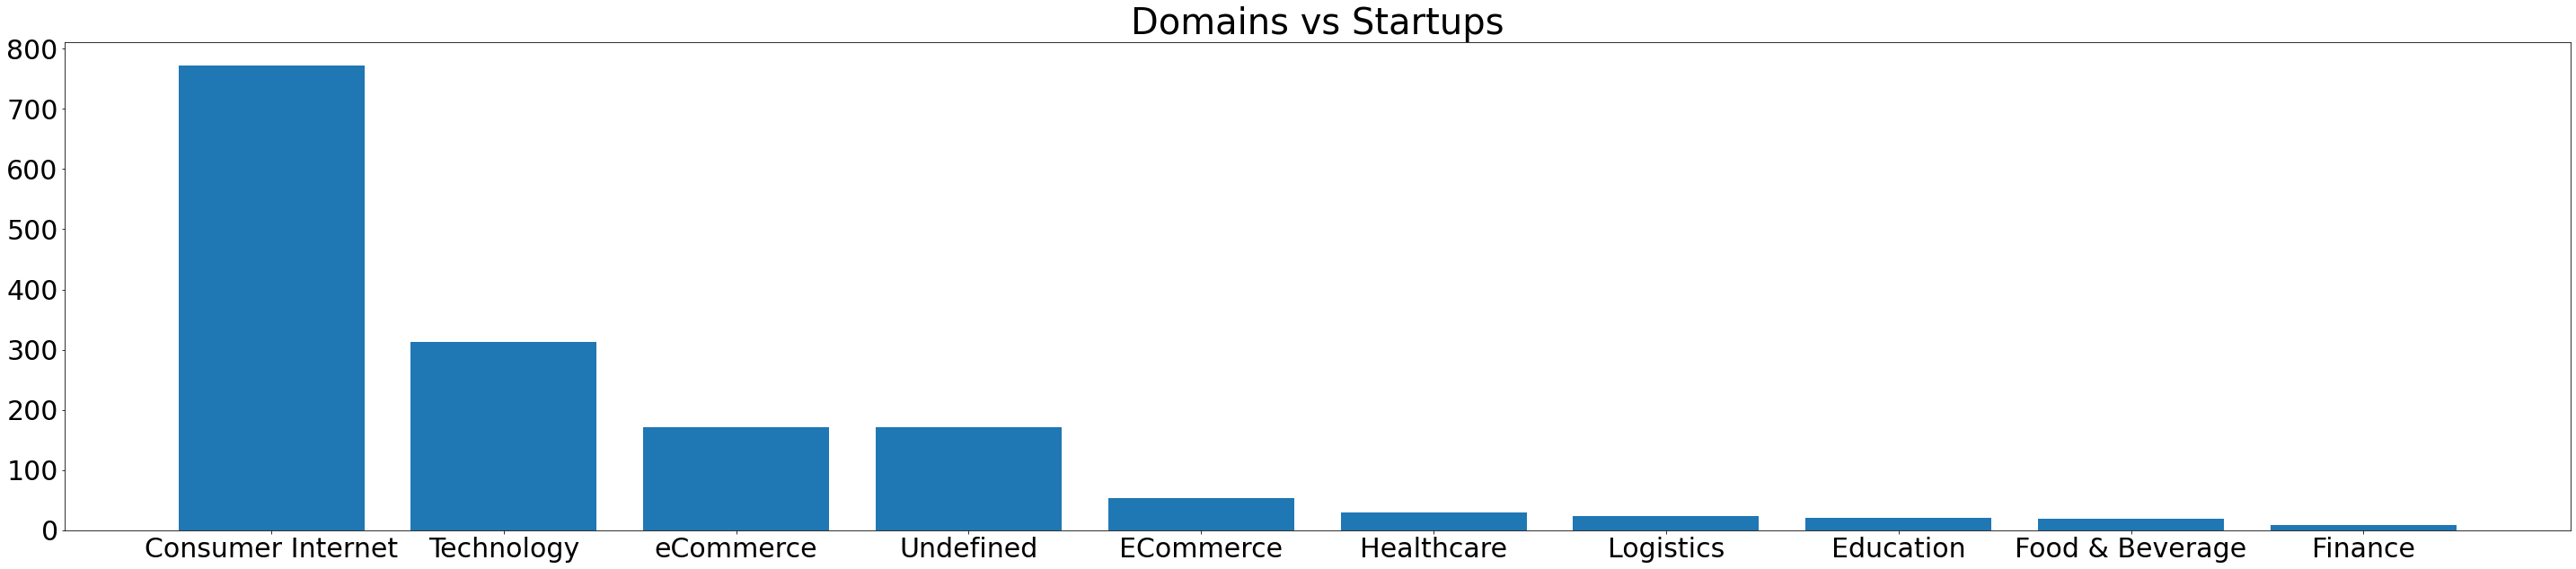

In [15]:
fig = plt.figure(figsize=(50,10))
freq =sorted(freq.items(), key=lambda kv: kv[1], reverse=True)
freq
plt.bar([i[0] for i in freq[:10]], [i[1] for i in freq[:10]])
plt.title("Domains vs Startups", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
fig.savefig("Domains.png")

## In the above visualization, the number of startups based on the domain is listed,  for this we took the number of rows available for each domain
### To identify in which domains more startups are started

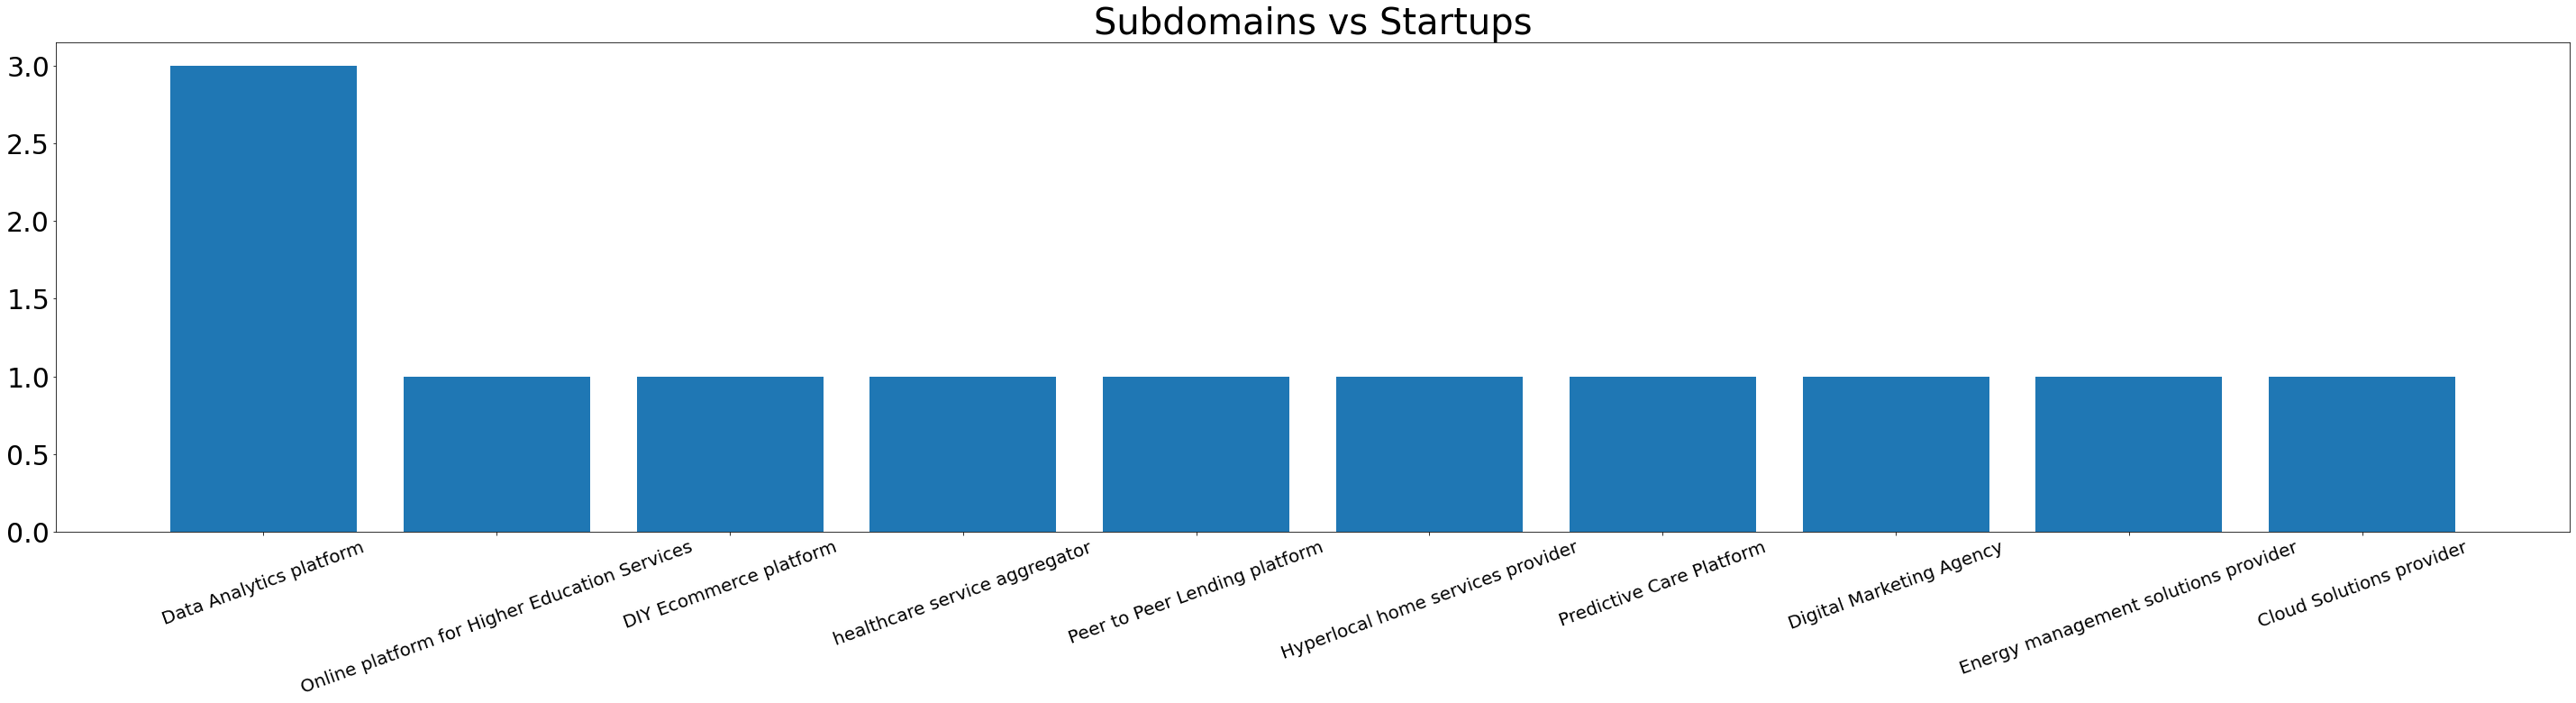

In [16]:

freq = {}
lst1 =  df[df["IndustryVertical"] == "Consumer Internet"]["SubVertical"].to_list()
lst1
for items in lst1[:5]:
    freq[items] = lst1.count(items)
lst2 =  df[df["IndustryVertical"] == "Technology"]["SubVertical"].to_list()
lst2
for items in lst2:
    freq[items] = lst2.count(items)
fig = plt.figure(figsize=(50,10))
freq =sorted(freq.items(), key=lambda kv: kv[1], reverse=True)
freq
plt.bar([i[0] for i in freq[:10]], [i[1] for i in freq[:10]])
plt.title("Subdomains vs Startups", fontsize=40)
plt.xticks(fontsize=20, rotation=20)
plt.yticks(fontsize=30)
fig.savefig("SubDomain.png")

## In the above visualization, the number of startups based on the sub-domain is listed,  for this we took the number of rows available for each sub-domain
### To identify which sub-domain has increasing start-ups

In [17]:
def convert_AmountInUSD(x):
    x = str(x)
    if re.search(',',x):
        return (x.replace(',',''))
    return x
df['AmountInUSD']=df["AmountInUSD"].fillna(value='0').apply(convert_AmountInUSD).astype('int')

<Figure size 3600x720 with 0 Axes>

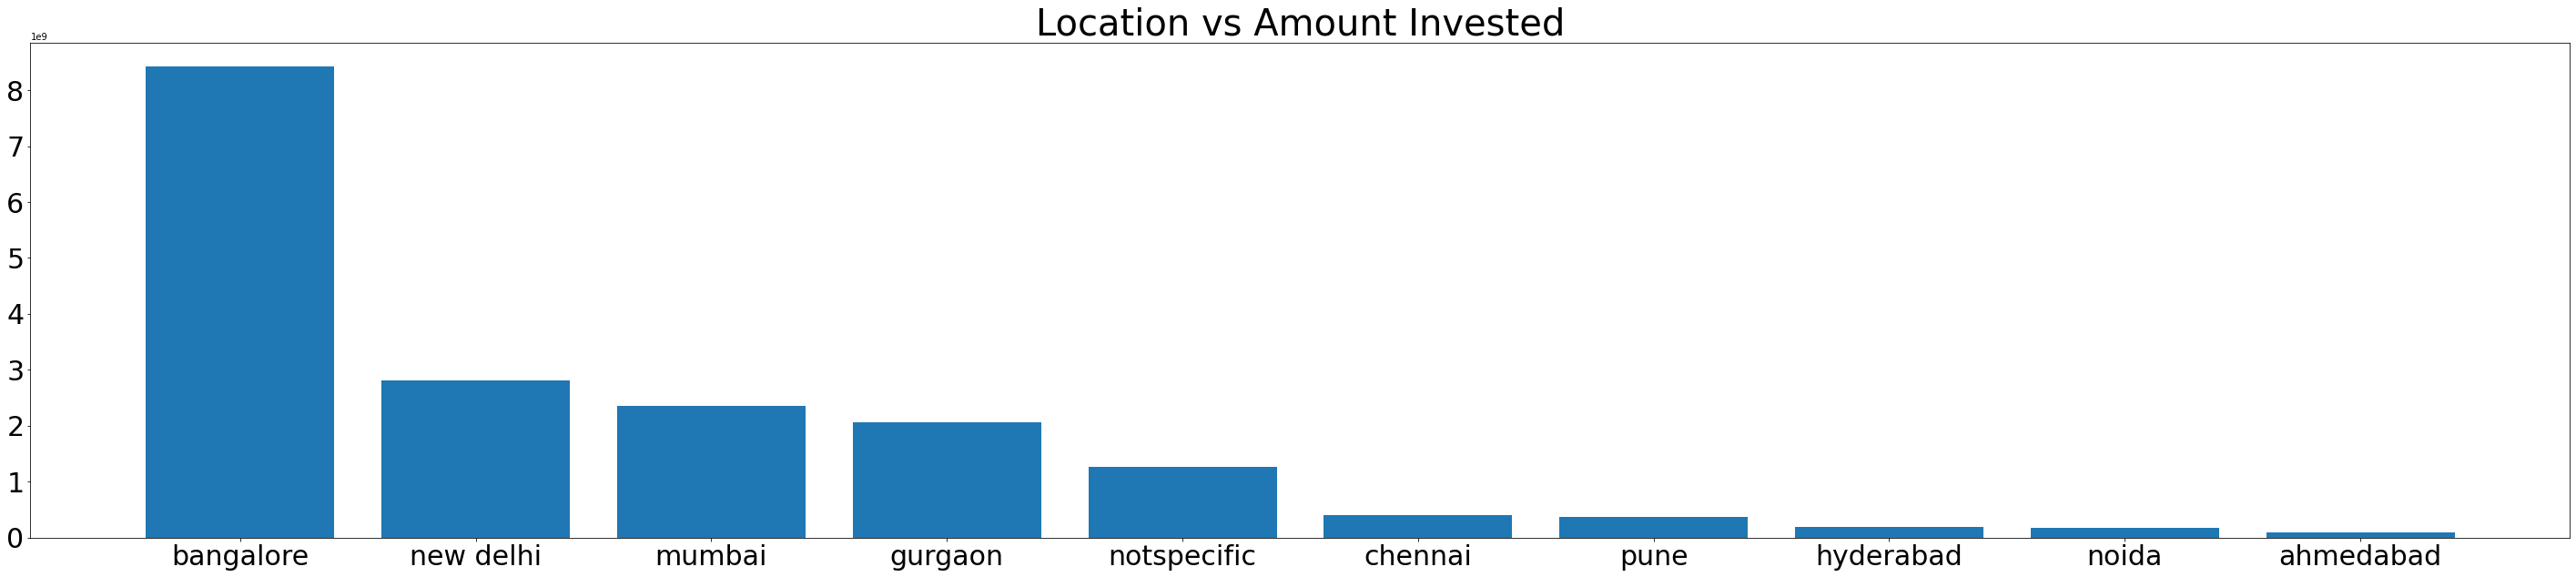

In [18]:
fig = plt.figure(figsize=(50,10))
lst = df.groupby("CityLocation", as_index=False)["AmountInUSD"].sum().to_numpy()
freq =sorted(lst, key=lambda kv: kv[1], reverse=True)
fig = plt.figure(figsize=(50,10))
plt.bar([i[0] for i in freq[:10]], [i[1] for i in freq[:10]])
plt.title("Location vs Amount Invested", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
fig.savefig("Investments.png")

## In the above visualization, the number of startups based on their investments is listed,  for this we took the sum of all investments in a location

### To identify the relative investments in the locations

<Figure size 3600x720 with 0 Axes>

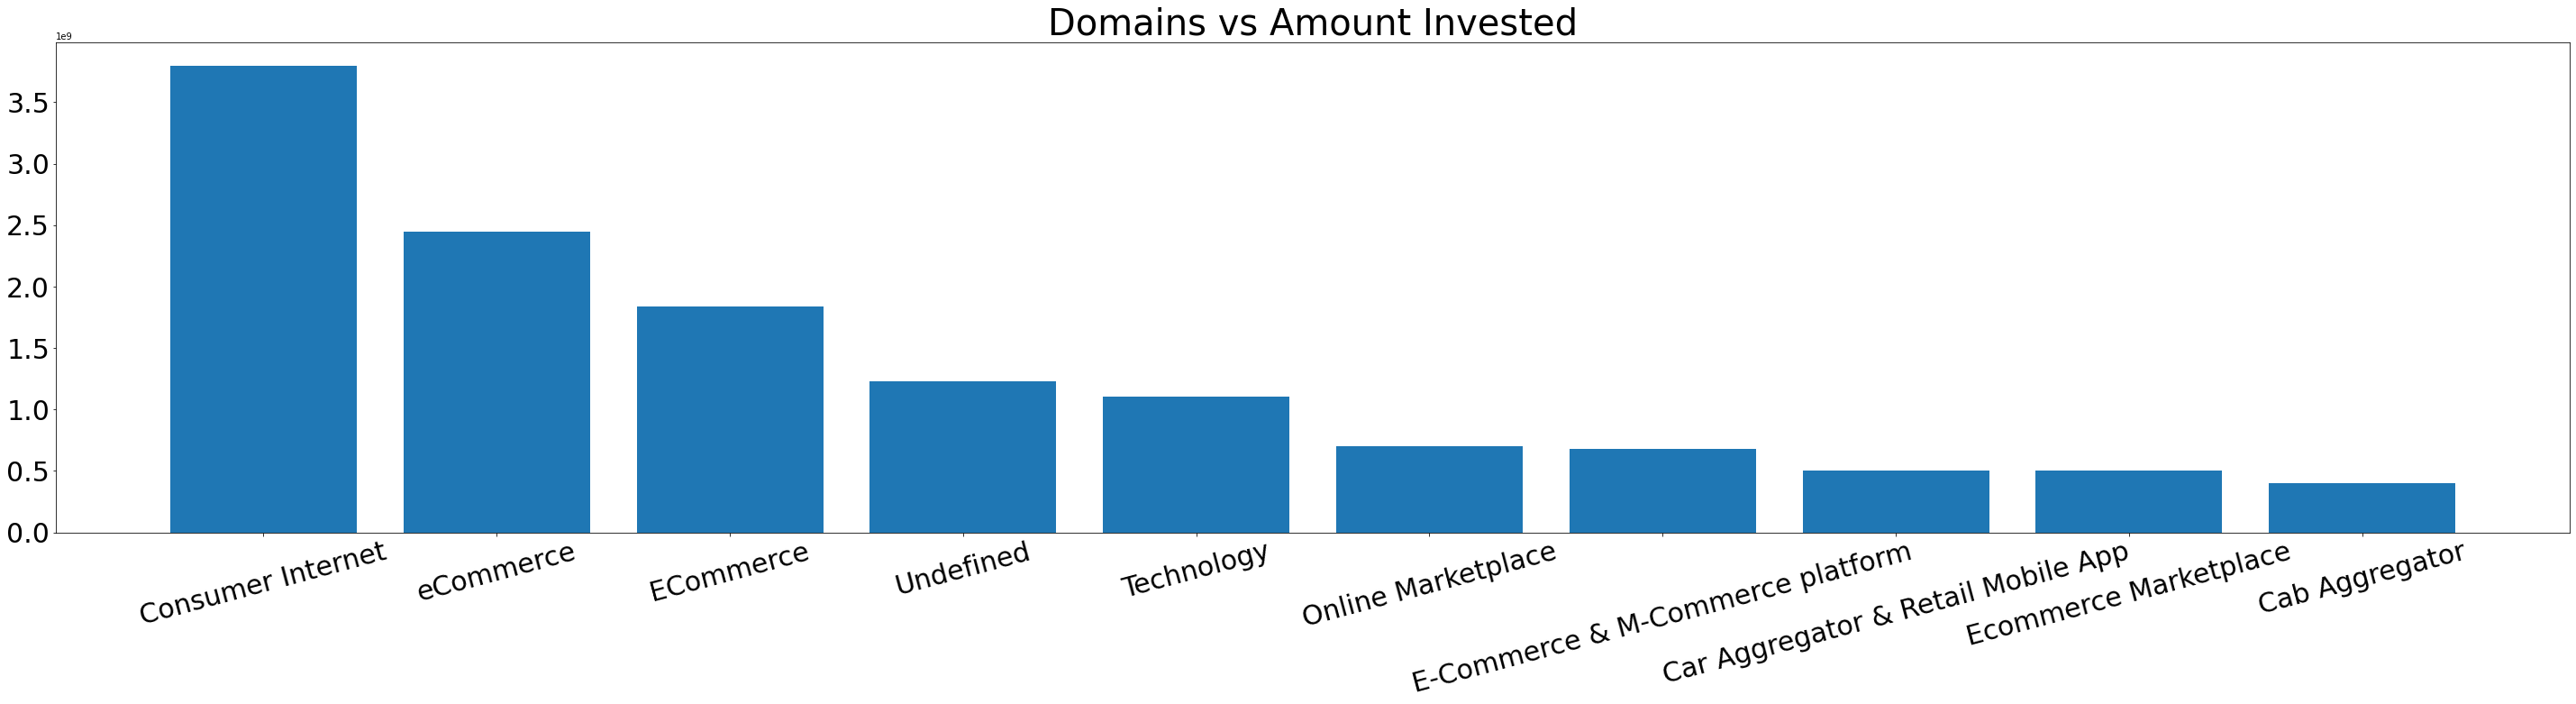

In [19]:
fig = plt.figure(figsize=(50,10))
lst = df.groupby("IndustryVertical", as_index=False)["AmountInUSD"].sum().to_numpy()
freq =sorted(lst, key=lambda kv: kv[1], reverse=True)
fig = plt.figure(figsize=(50,10))
plt.bar([i[0] for i in freq[:10]], [i[1] for i in freq[:10]])
plt.title("Domains vs Amount Invested", fontsize=40)
plt.xticks(fontsize=30, rotation=15)
plt.yticks(fontsize=30)
fig.savefig("InvestedDomains.png")

## In the above visualization, the number of startups based on their investments is listed, for this we took the sum of all investments in a domain
### To identify the relative investments across domains

In [20]:
x = df["CityLocation"].unique()[:49]
b = df[df["CityLocation"] == "bangalore"]["IndustryVertical"].value_counts().sort_values(ascending=False)[:49]
nd = df[df["CityLocation"] == "new delhi"]["IndustryVertical"].value_counts().sort_values(ascending=False)[:49]
m = df[df["CityLocation"] == "mumbai"]["IndustryVertical"].value_counts().sort_values(ascending=False)[:49]
# c = df[df["CityLocation"] == "chennai"]["IndustryVertical"].value_counts().sort_values(ascending=False)[:49]
b, nd, m

(Consumer Internet                                          233
 Technology                                                 107
 eCommerce                                                   42
 ECommerce                                                   20
 Healthcare                                                   9
 Logistics                                                    6
 Education                                                    5
 Online Food Delivery                                         3
 Real Estate                                                  2
 Cab rental Mobile app                                        2
 Health & Fitness App                                         2
 Online Hiring Platform                                       2
 Interface development platform for Government officials      2
 Job Search Platform                                          2
 Home services marketplace                                    2
 Online Logistics Platform              

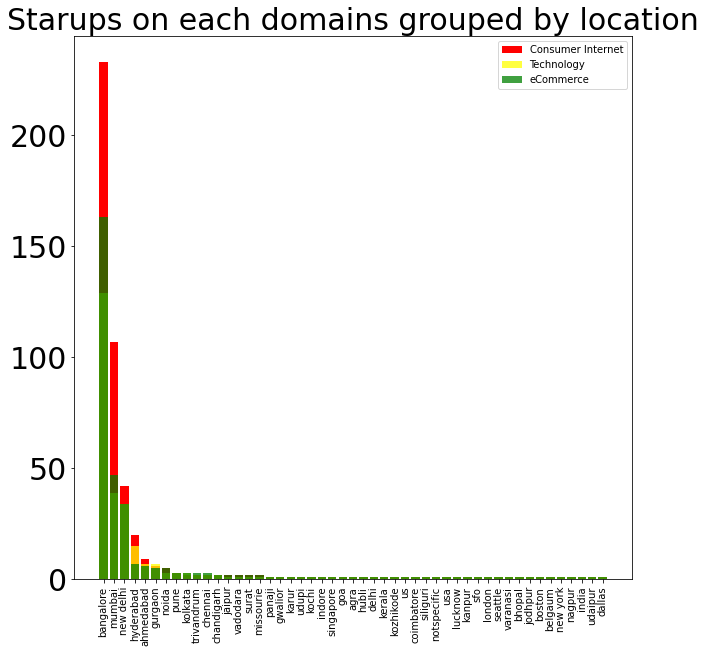

In [21]:
fig = plt.figure(figsize=(10,10))
plt.bar(x, b, color="red")
plt.bar(x, nd, alpha=0.75, color="yellow")
plt.bar(x, m, alpha=0.75, color="green")
plt.title("Starups on each domains grouped by location", fontsize=30)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=30)
plt.legend(["Consumer Internet", "Technology", "eCommerce"])
fig.savefig("DomainGroupLocation-all.png")

## In the above visualization, the number of startups based on the domain and their location is listed,  for this we took the number of rows available for each location and domain is taken
### To identify the number of startups ineach location grouped by their domain

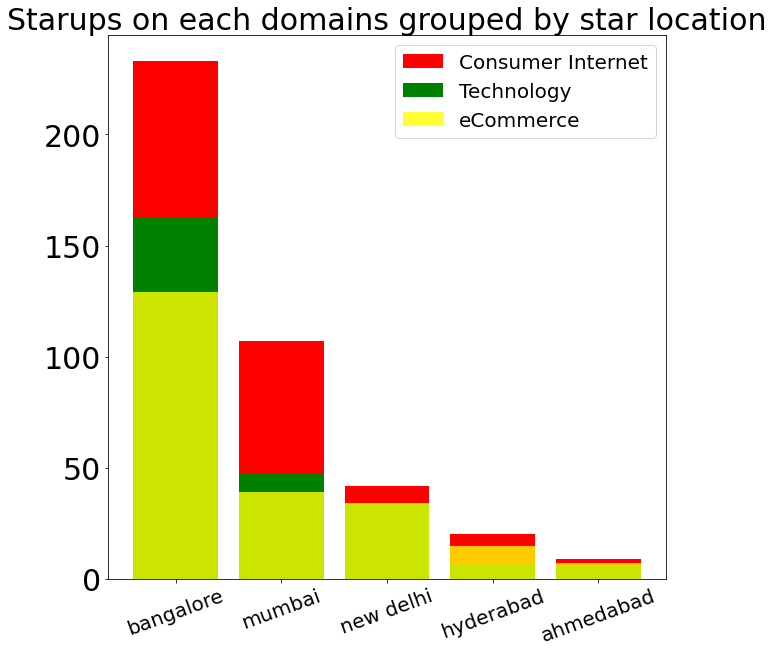

In [22]:
fig = plt.figure(figsize=(10,10))
# width = 
plt.bar(x[:5], b[:5], color="red")
plt.bar(x[:5], m[:5], alpha=1, color="green")
plt.bar(x[:5], nd[:5], alpha=0.8, color="yellow")
plt.title("Starups on each domains grouped by star location", fontsize=30)
plt.xticks(fontsize=20, rotation=20)
plt.yticks(fontsize=30)
plt.legend(["Consumer Internet", "Technology", "eCommerce"], fontsize=20)
fig.savefig("DomainGroupLocation.png")

## In the above visualization, the number of startups based on the domain and their location is listed, for this we took the number of rows available for each location and domain is taken, the first 5 locations are focussed here.
### To identify the number of startups in each domains grouped by location